<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#GradCAM" data-toc-modified-id="GradCAM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GradCAM</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CIFAR10</a></span></li><li><span><a href="#Save-saliency-maps" data-toc-modified-id="Save-saliency-maps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save saliency maps</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [2]:
import torch

import numpy as np 
import sys
sys.path.append('../code')

from dataload import cifar10_load, mnist_load
from saliency.attribution_methods import GradCAM
from saliency.ensembles import *
from utils import get_samples
from visualization import visualize_saliencys

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [9]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist',attention='CBAM')

Data Complete
filename:  simple_cnn_mnist_CBAM
Model Complete


In [10]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10',attention='CBAM')

Files already downloaded and verified
Files already downloaded and verified
Data Complete
filename:  simple_cnn_cifar10_CBAM
Model Complete


# GradCAM

In [11]:
GC_mnist = GradCAM(mnist_model)
GC_cifar10 = GradCAM(cifar10_model)

# MNIST

In [12]:
# GC
outputs, probs, preds = GC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=8)

# ensemble
n = 50
sigma = 2
# GC + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, GC_mnist, layer=8)
# GC + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, GC_mnist, layer=8)
# GC + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, GC_mnist, layer=8)

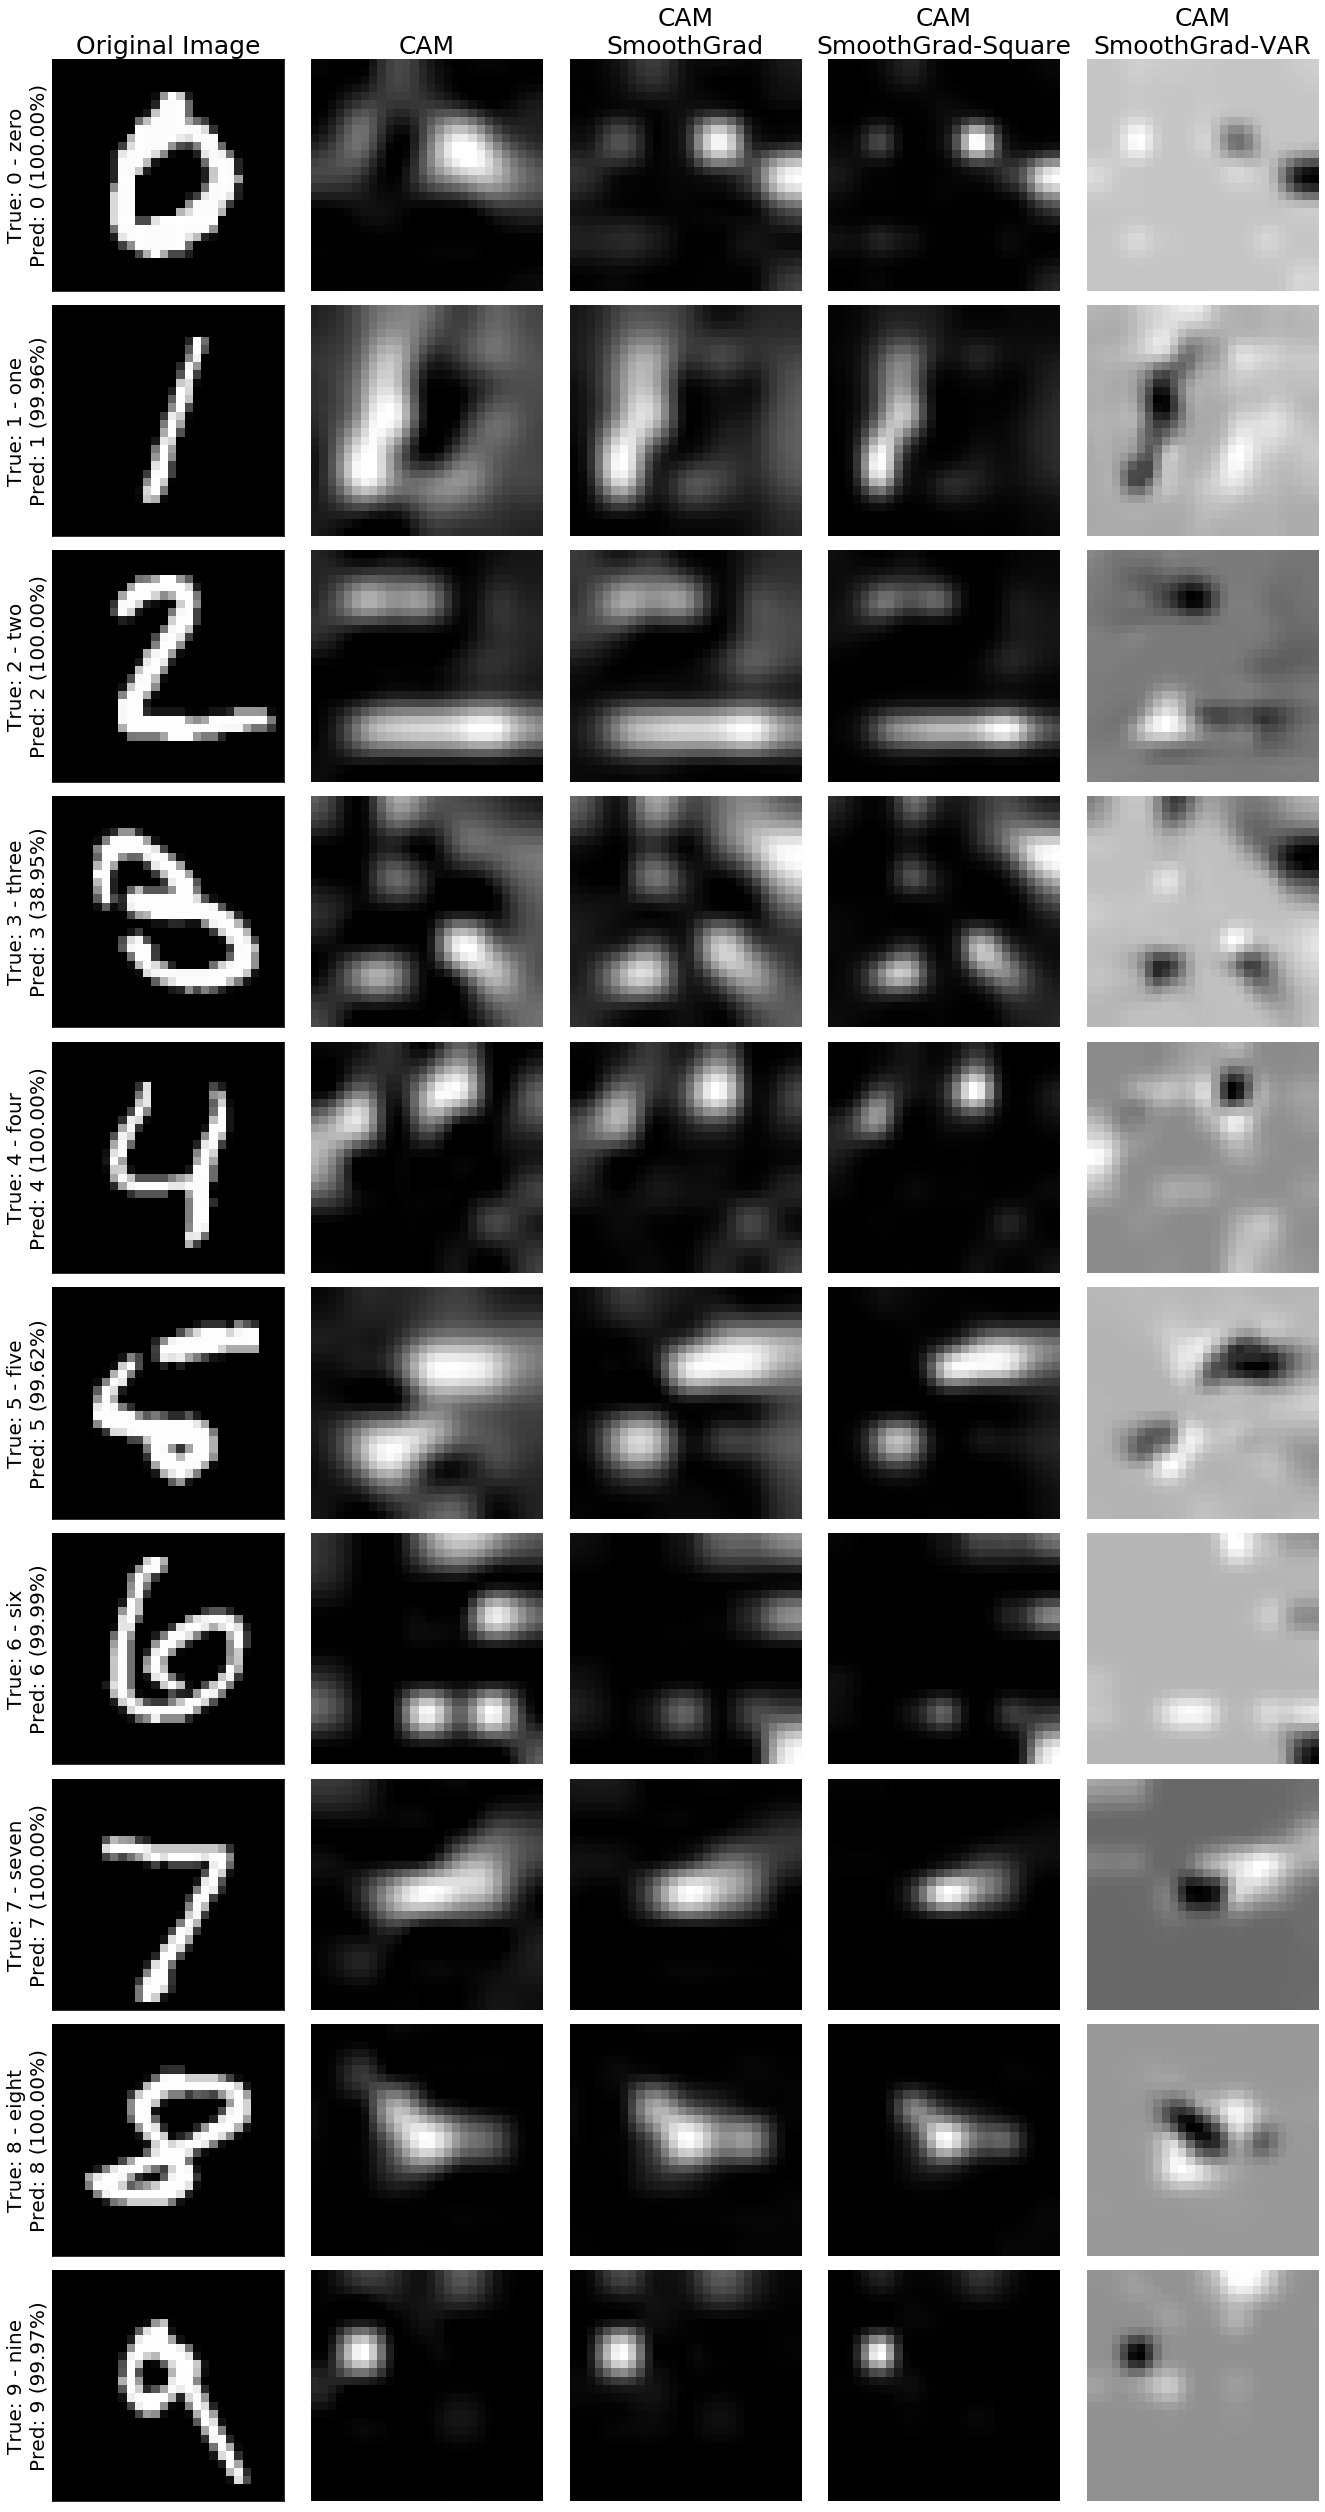

In [13]:
input_outputs = (outputs * 0.5 + original_images_mnist * 0.5).astype(int)

names = ['GradCAM',
         'GradCAM\nSmoothGrad','GradCAM\nSmoothGrad-Square','GradCAM\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# CIFAR10

In [14]:
# GC
outputs, probs, preds = GC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=8, color=True)

# ensemble
n = 50
sigma = 2
# GC + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GC_cifar10, layer=8, color=True)
# GC + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GC_cifar10, layer=8, color=True)
# GC + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GC_cifar10, layer=8, color=True)

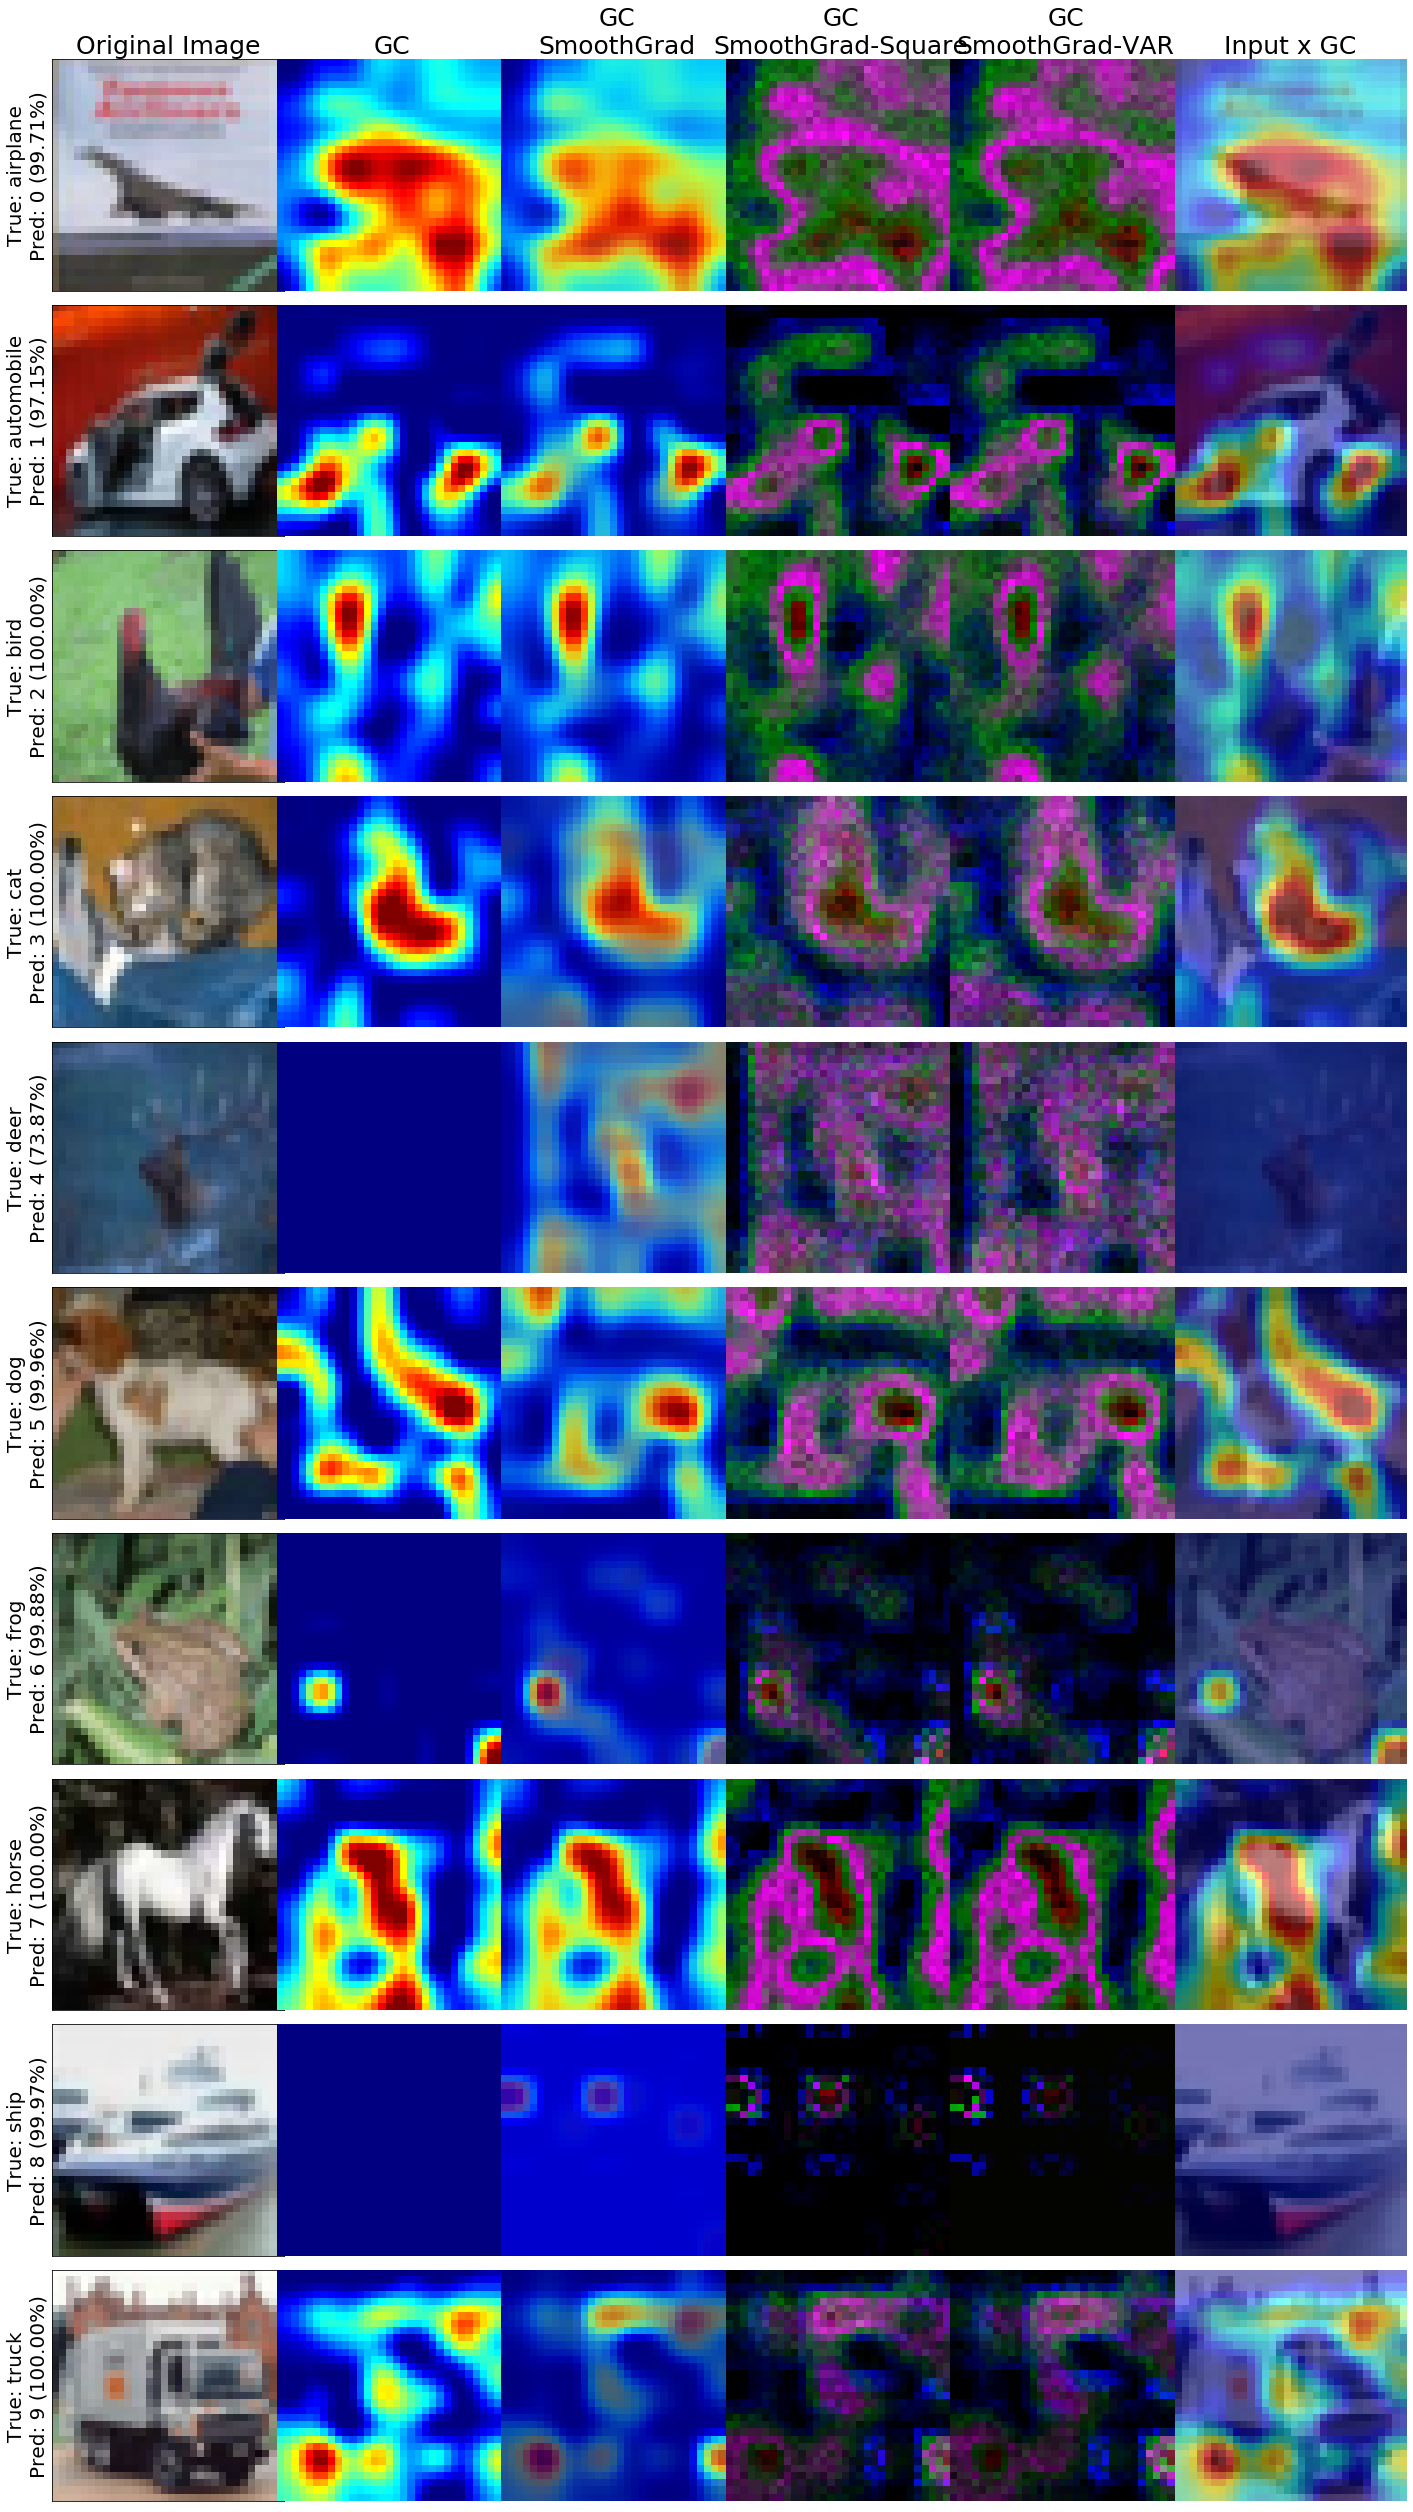

In [15]:
input_outputs = (outputs * 0.5 + original_images_cifar10 * 0.5).astype(int)

names = ['GC',
         'GC\nSmoothGrad','GC\nSmoothGrad-Square','GC\nSmoothGrad-VAR', 'Input x GC'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR, input_outputs]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=6, row=10, size=(20,35), labelsize=20, fontsize=25)

# Save saliency maps

## MNIST

In [16]:
trainloader, validloader, testloader = mnist_load(shuffle=False)

Data Complete


In [18]:
GC_mnist.save_saliency_map(trainloader, '../saliency_maps/[mnist]GC_CBAM_train.hdf5')
GC_mnist.save_saliency_map(validloader, '../saliency_maps/[mnist]GC_CBAM_valid.hdf5')
GC_mnist.save_saliency_map(testloader, '../saliency_maps/[mnist]GC_CBAM_test.hdf5')

GradCAM:   0%|                                                                                                                                                                            | 0/94 [00:00<?, ?it/s]

Save saliency maps


GradCAM:   0%|                                                                                                                                                                            | 0/79 [00:00<?, ?it/s]

Save saliency maps


GradCAM: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:35<00:00,  2.25it/s]

Save saliency maps


## CIFAR10

In [20]:
trainloader, validloader, testloader = cifar10_load(shuffle=False, augmentation=False)

Files already downloaded and verified
Files already downloaded and verified
Data Complete


In [21]:
GC_cifar10.save_saliency_map(trainloader, '../saliency_maps/[cifar10]GC_CBAM_train.hdf5', color=True)
GC_cifar10.save_saliency_map(validloader, '../saliency_maps/[cifar10]GC_CBAM_valid.hdf5', color=True)
GC_cifar10.save_saliency_map(testloader, '../saliency_maps/[cifar10]GC_CBAM_test.hdf5', color=True)

GradCAM:   0%|                                                                                                                                                                            | 0/79 [00:00<?, ?it/s]

Save saliency maps


GradCAM:   0%|                                                                                                                                                                            | 0/79 [00:00<?, ?it/s]

Save saliency maps


GradCAM: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:54<00:00,  1.46it/s]

Save saliency maps
